# Árboles de decisión

En esta sesión de trabajo con Jupyter aplicaremos los conceptos presentados en el módulo sobre árboles de decisión al conjunto de datos Iris.

## Procesado de los datos

En este ejercicios vamos a utilizar de nuevo el conjunto de datos [datos Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) que contiene información de tres especies de la flor Iris: Iris setosa, Iris virginica e Iris versicolor. Recordemos que en este conjunto de datos hay información de 150 muestras de flores, 50 de cada tipo, sobre el largo y el ancho del pétalo y el sépalo, medidos en centímetros.

Cargamos el conjunto de datos Iris incluido en Scikit-learn, usando la función [`load_iris()`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) de la biblioteca `sklearn.datasets`

In [52]:
from sklearn.datasets import load_iris

iris = load_iris()

Almacenamos los campos que resultan de interés para este ejercicio en variables distintas.

In [53]:
X_data, y_data, X_names, y_names = \
    iris.data, iris.target, iris.feature_names, iris.target_names

Vamos a recordar cómo se distribuían estos datos y para ello los visualizaremos usando la librería `matplotlib`. Para esto, consideramos un par de características y presentamos en un gráfico 2D un conjunto de puntos que representan cada uno de los ejemplos del conjunto de datos. Para diferenciar los valores de clasificación usamos distintas formas y colores para cada uno de ellos: cuadrados rojos para el primer valor de clasificación (Iris setosa), círculos verdes para el segundo valor de clasificación (Iris versicolor) y rombos azules para el tercer valor de clasificación (Iris virgínica).

Cargamos la biblioteca [`pyplot`](https://matplotlib.org/api/pyplot_api.html) de la librería `matplotlib` con el nombre `plt`:

In [54]:
from matplotlib import pyplot as plt

El proceso para dibujar los datos consiste en limpiar el lienzo (`plt.clf()`) y para cada terna formada por el valor de clasificación (`range(len(clases))`), la forma (`"soD"`) y el color (`"rgb"`) deseados, recoger los valores de las características a representar (`c1` y `c2`) de todos los datos con el valor de clasificación considerado. Estos puntos se representan con el método (`plt.scatter`) con la forma y el color fijados. Finalmente etiquetamos los ejes horizontal y vertical con los nombres de las características representadas.

Este proceso se puede definir como el efecto de una función:

In [55]:
def representacion_grafica(datos,caracteristicas,objetivo,clases,c1,c2):
    for tipo,marca,color in zip(range(len(clases)),"soD","rgb"):
        plt.scatter(datos[objetivo == tipo,c1],
                    datos[objetivo == tipo,c2],marker=marca,c=color)
    plt.xlabel(caracteristicas[c1])
    plt.ylabel(caracteristicas[c2])

Ahora utilizamos esta función para representar gráficamente la distribución de los datos con respecto a cada pareja de características. Eso se consigue dividiendo el lienzo en seis trozos, en 2 filas y 3 columnas con las correspondientes llamadas al método `plt.subplot`:

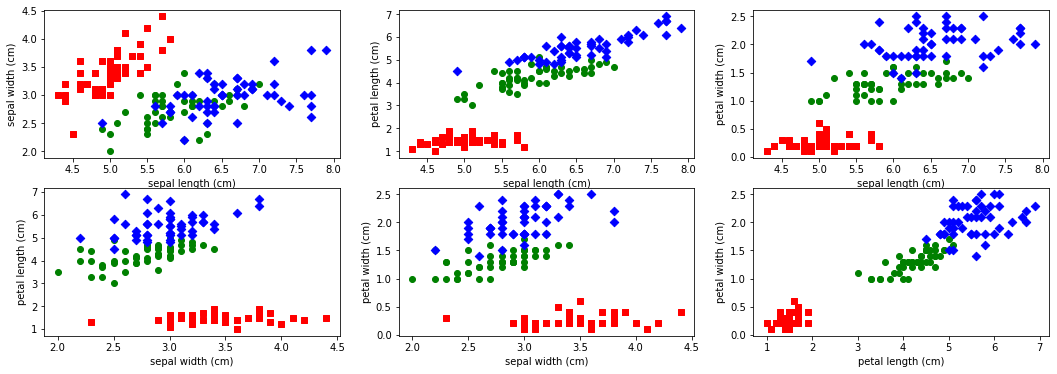

In [56]:
def representacion_conjunta():
    plt.clf()
    plt.rcParams["figure.figsize"] = [18,12]
    plt.subplot(231)
    representacion_grafica(X_data,X_names,y_data,y_names,0,1)
    plt.subplot(232)
    representacion_grafica(X_data,X_names,y_data,y_names,0,2)
    plt.subplot(233)
    representacion_grafica(X_data,X_names,y_data,y_names,0,3)
    plt.subplot(234)
    representacion_grafica(X_data,X_names,y_data,y_names,1,2)
    plt.subplot(235)
    representacion_grafica(X_data,X_names,y_data,y_names,1,3)
    plt.subplot(236)
    representacion_grafica(X_data,X_names,y_data,y_names,2,3)
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    plt.show()

representacion_conjunta()

Estos gráficos nos sirven para ver que las características que mejor separan los datos (y por tanto las que mejor sirven para clasificarlos) son la longitud y anchura del pétalo. 

## Árboles de decisión

El algoritmo de aprendizaje de árboles de decisión que está incluido en *scikit_learn* es CART. Al igual que otros modelos de clasificación, está implementado como una clase, [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), de la librería [`tree`](http://scikit-learn.org/stable/modules/tree.html). Importamos esta clase y creamos una instancia del algoritmo de aprendizaje.

In [57]:
from sklearn.tree import DecisionTreeClassifier

tree1_clf = DecisionTreeClassifier()

Los modelos de clasificación incluidos en *scikit_learn* sirven para conjuntos de datos numéricos, tal y como el ejemplo que estamos considerando. En caso de que nuestro conjunto de datos tuviese características categóricas, tendríamos que preprocesarlos para transformar sus valores literales en valores númericos.

Como otros modelos de clasificación en *scikit_learn*, la clase `DecisionTreeClassifier` dispone de un método para entrenar el modelo (`fit`) al que hay que pasar el conjunto de entrenamiento con dos argumentos, un array con el conjunto de datos y otro con el valor de clasificación para esos datos.

In [58]:
tree1_clf.fit(X_data,y_data)

DecisionTreeClassifier()

Al enternar el modelo, obtenemos como resultado la descripción del árbol de decisión con los valores de los parámetros que se han usado en el algoritmo de aprendizaje. Estos valores servirán para ajustar el proceso de aprendizaje y los veremos más adelante. Veamos ahora el aspecto que tiene el árbol de decisión aprendido. 

Para esto vamos a usar el método [`export_graphviz`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) de la librería `tree`. Este método genera una descripción del árbol de decisión en el formato `dot` del software de visualización de grafos [`graphviz`](https://www.graphviz.org/). En la llamada de este método pasamos como argumento el modelo de clasificación entrenado, el fichero en el que queremos almacenar el resultado (con la extensión `dot`) y otras opciones como el array de nombres de las características y detalles relacionados con la representación gráfica.

In [59]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree1_clf,
    out_file="iris_tree1.dot",
    feature_names=iris.feature_names,
    rounded=True,
    filled=True)

Un grafo en formato `dot` puede ser dibujado en distintos formatos con la utilidad del mismo nombre disponible en el sofware de visualización de grafos [`graphviz`](https://www.graphviz.org/download/). Para usarlo ejecutamos la utilidad `dot` mediante una llamada al sistema con los parámetros adecuados para generar el gráfico.

In [60]:
!dot -Tpng iris_tree1.dot -o iris_tree1.png

Para ver el árbol de decisión generado, lo incluimos como una imagen externa en la paleta de dibujo de `matplotlib`:

<Figure size 1296x864 with 0 Axes>

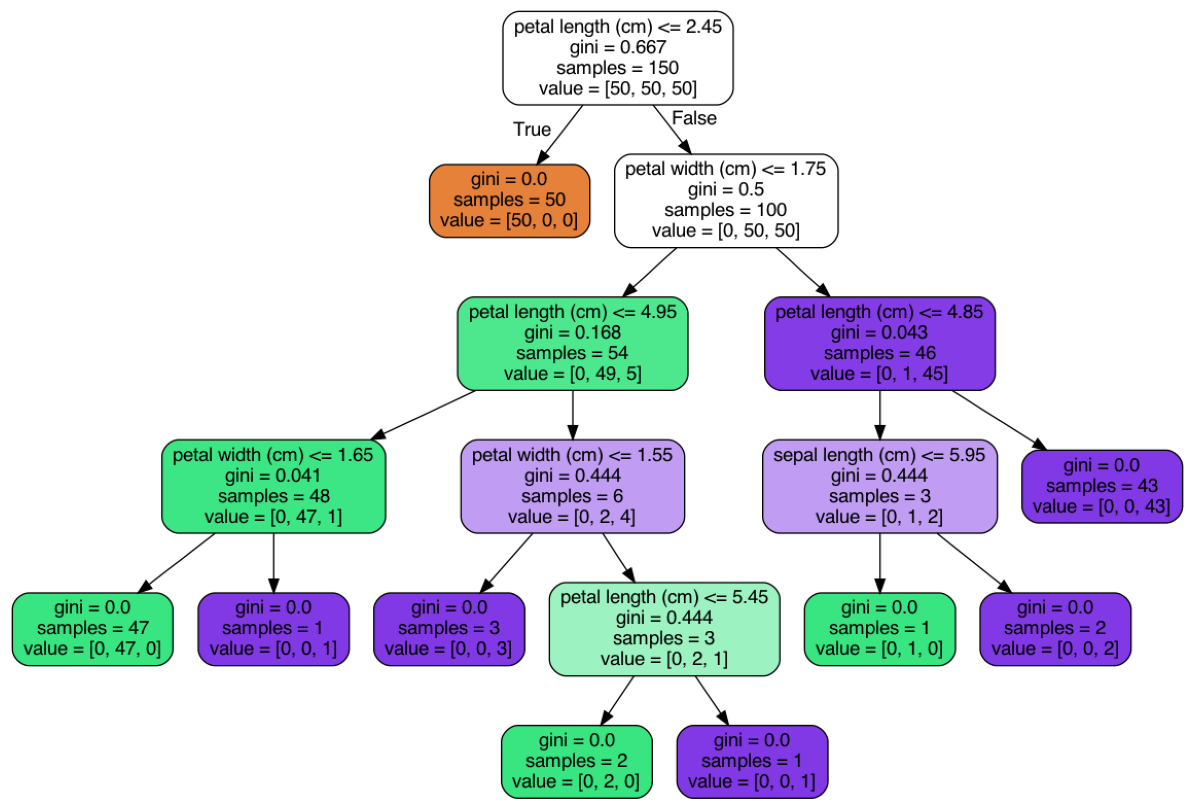

In [61]:
plt.clf()
image = plt.imread("iris_tree1.png")
height, width, depth = image.shape
dpi = 70
figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
plt.axis('off')
plt.imshow(image)
plt.show()

Vamos a definir la función `show_tree` para realizar esta tarea de forma más comoda las próximas veces.

<Figure size 1296x864 with 0 Axes>

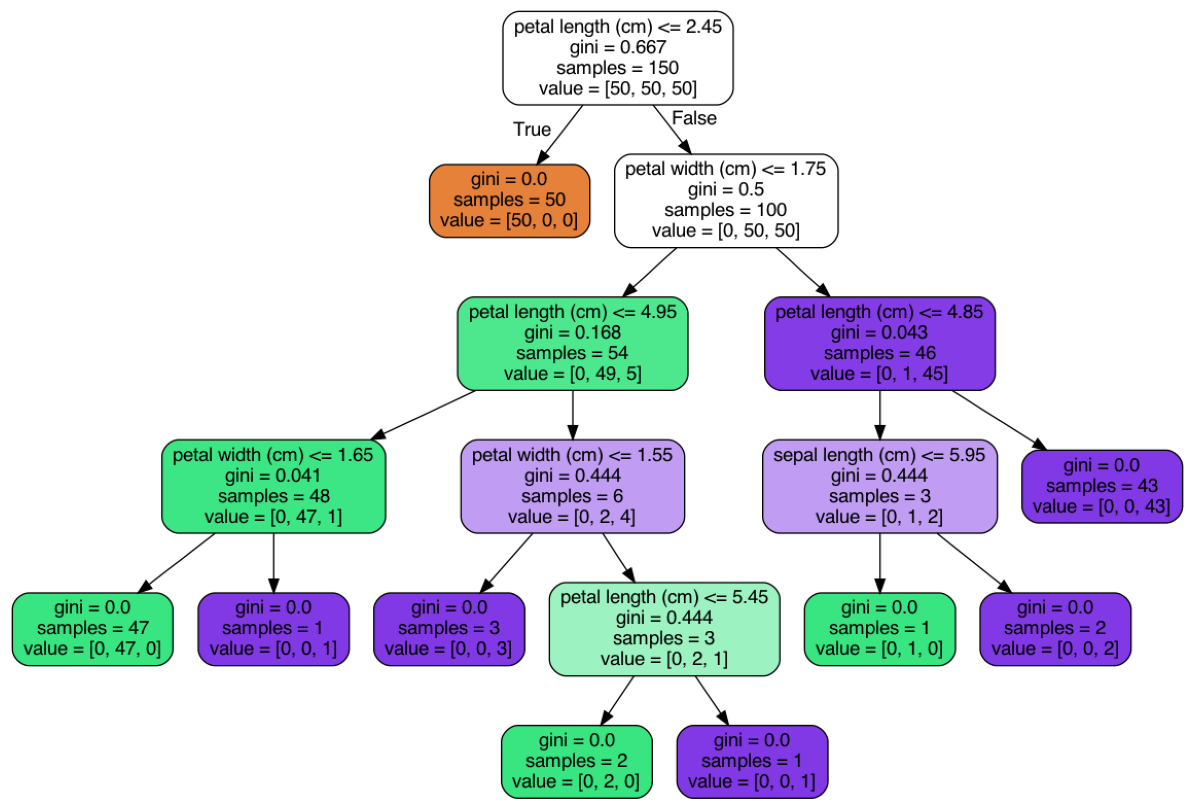

In [62]:
def show_tree(tree_clf,features):
    export_graphviz(
        tree_clf,
        out_file="tree_clf.dot",
        feature_names=features,
        rounded=True,
        filled=True)
    !dot -Tpng tree_clf.dot -o tree_clf.png
    plt.clf()
    dpi = 70
    image = plt.imread("tree_clf.png")
    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
show_tree(tree1_clf,iris.feature_names)

Cada nodo interno del árbol anterior muestra información sobre el criterio de separación elegido, el valor del grado de dispersión o impureza para dicho nodo, el número de ejemplos del conjunto de entrenamiento asociados a ese nodo y la distribución de los valores de clasificación para dichos ejemplos. 

Por ejemplo, el nodo inicial nos indica que el primer criterio de separación elegido consiste en comprobar si la anchura del pétalo es menor o igual que `0.8` centímetros. Eso quiere decir que éste es el criterio de separación que mejor clasifica los datos iniciales. El conjunto de datos inicial, que está asociado a este nodo, tiene un grado de dispersión (en este caso el índice de Gini) de `0.667`, está formado por `150` muestras (todas las del conjunto de entrenamiento) y su distribución en los tres valores de clasificación es `[50,50,50]`. El valor del índice de Gini para este nodo se puede confirmar con esta información:

$$G({\cal S}) = 1 - \sum_{j=1}^k {p_j}^2 = 1 - \sum_{j=1}^3 (\frac{1}{3})^2 = 1 - \frac{3}{9} = \frac{2}{3} \approx 0.667$$

Como se puede observar del resultado del primer criterio de separación, hay un total de `50` muestras cuyo valor de anchura de pétalo es menor o igual que `0.8` y otras `100` que están por encima. El conjunto de muestras asociado a la rama de la izquierda tiene un índice de Gini de `0` pues todas son del tipo Iris setosa. Por tanto, el nodo de la izquierda es un nodo hoja que tiene asociado el valor de clasificación "Iris setosa". Su color está asociado con ese valor de clasificación.

Por otro lado, hay un total de `100` muestras cuyo valor de anchura de pétalo es mayor que `0.8`. Estas son las muestras asociadas al siguiente nodo de la rama de la derecha. La distribución de los valores de clasificación en este conjunto es `[0,50,50]`, de aquí que su grado de impureza sea `0.5`. De nuevo, este dato se puede confirmar con los datos disponibles usando la fórmula del índice de Gini.

Dado que en este nodo las muestras no están correctamente clasificadas, hay que buscar otro criterio de separación. En este caso consiste en comprobar si la anchura del pétalo es menor o igual que `1.75` centímetros. En este caso el conjunto de datos (las `100` muestras de Iris virgínica e Iris versicolor), queda dividido en dos subconjuntos. El de la izquierda está formado por `54` muestras (`49` de la clase Iris versicolor y `5` de la clase Iris virgínica), con un índice de impureza de `0.168`. El de la derecha está formado por `46` muestras (`1` de la clase Iris versicolor y `45` de la clase Iris virgínica), con un índice de impureza de `0.043`. Aunque en estos nodos no se tiene una clasificación definitiva de los datos, ésta está casi determinada, lo que se refleja en el color asociado a estos nodos.

Como hemos visto el grado de dispersión se ha calculado usando el índice de Gini. Este es el valor por defecto del algoritmo de aprendizaje de árboles de decisión en *scikit_learn*. Podemos cambiar este criterio usando el parámetro `criterion` del constructor de la clase `DecisionTreeClassifier`. Los valores disponibles son `gini` para usar el índice de Gini y `entropy` para usar la ganancia de información. Veamos como queda el árbol de decisión construido usando la ganancia de información:

In [63]:
tree2_clf = DecisionTreeClassifier(criterion='entropy')

tree2_clf.fit(X_data,y_data)

DecisionTreeClassifier(criterion='entropy')

Si visualizamos este árbol de decisión, observaremos que es prácticamente igual al anterior.

<Figure size 1296x864 with 0 Axes>

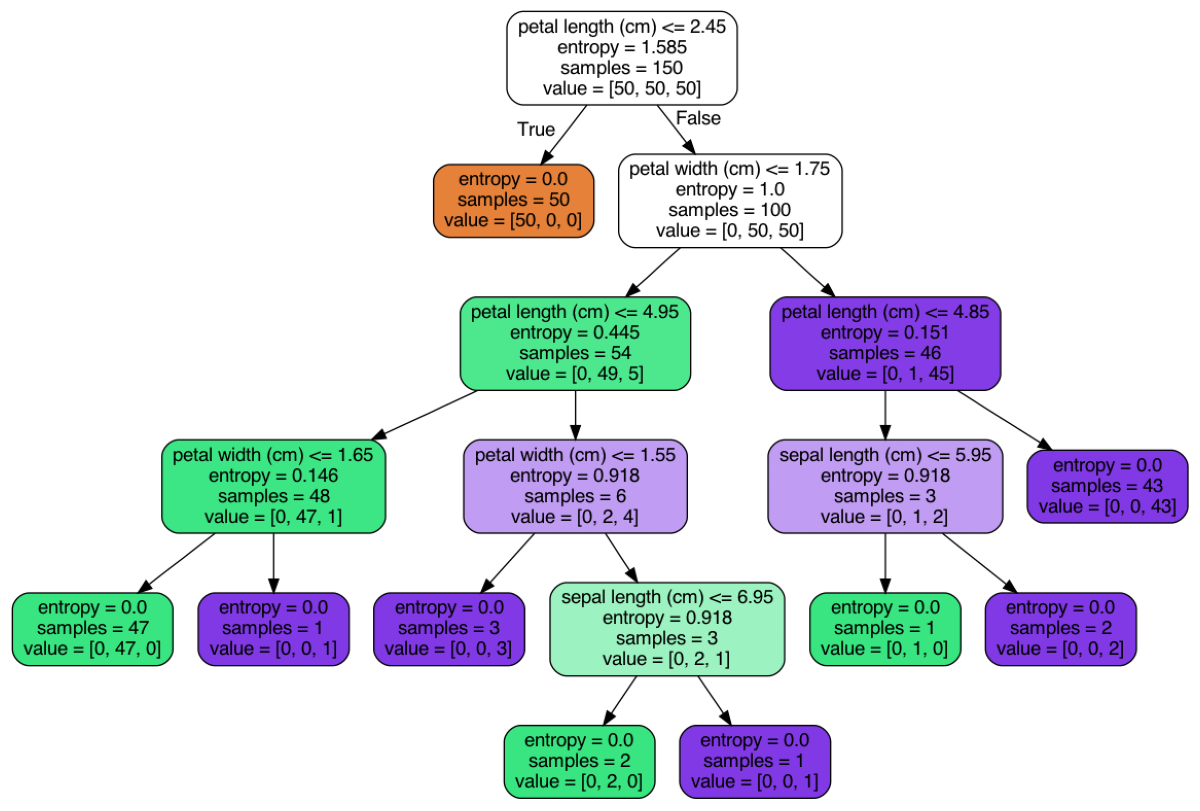

In [64]:
show_tree(tree2_clf,iris.feature_names)

## Análisis de los criterios de separación

Veamos ahora con más detalle cómo se buscan los mejores criterios de separación en el algoritmo CART. Estos criterios de separación consisten en comparar el valor de una característica con una cota, separando las muestras que tienen un valor menor o igual que la cota de aquellas que tienen un valor mayor que la cota. El funcionamiento del criterio es simple, al igual que la forma de calcular el mejor de todos: el que tiene un valor más bajo de la suma ponderada de los grados de impureza. Veamos a continuación como se escogen las cotas con respecto a las cuales se definen estos criterios.

Fijémonos en una característica en concreto, por ejemplo la longitud del pétalo. Primero debemos considerar todas las muestras asociadas al nodo en el que estamos buscando el criterio de separación, fijándonos en el valor de esta característica junto con su valor de clasificación.

In [65]:
Xy_pair = [(X_data[i,2],y_data[i]) for i in range(y_data.shape[0])]

Xy_pair

[(1.4, 0),
 (1.4, 0),
 (1.3, 0),
 (1.5, 0),
 (1.4, 0),
 (1.7, 0),
 (1.4, 0),
 (1.5, 0),
 (1.4, 0),
 (1.5, 0),
 (1.5, 0),
 (1.6, 0),
 (1.4, 0),
 (1.1, 0),
 (1.2, 0),
 (1.5, 0),
 (1.3, 0),
 (1.4, 0),
 (1.7, 0),
 (1.5, 0),
 (1.7, 0),
 (1.5, 0),
 (1.0, 0),
 (1.7, 0),
 (1.9, 0),
 (1.6, 0),
 (1.6, 0),
 (1.5, 0),
 (1.4, 0),
 (1.6, 0),
 (1.6, 0),
 (1.5, 0),
 (1.5, 0),
 (1.4, 0),
 (1.5, 0),
 (1.2, 0),
 (1.3, 0),
 (1.4, 0),
 (1.3, 0),
 (1.5, 0),
 (1.3, 0),
 (1.3, 0),
 (1.3, 0),
 (1.6, 0),
 (1.9, 0),
 (1.4, 0),
 (1.6, 0),
 (1.4, 0),
 (1.5, 0),
 (1.4, 0),
 (4.7, 1),
 (4.5, 1),
 (4.9, 1),
 (4.0, 1),
 (4.6, 1),
 (4.5, 1),
 (4.7, 1),
 (3.3, 1),
 (4.6, 1),
 (3.9, 1),
 (3.5, 1),
 (4.2, 1),
 (4.0, 1),
 (4.7, 1),
 (3.6, 1),
 (4.4, 1),
 (4.5, 1),
 (4.1, 1),
 (4.5, 1),
 (3.9, 1),
 (4.8, 1),
 (4.0, 1),
 (4.9, 1),
 (4.7, 1),
 (4.3, 1),
 (4.4, 1),
 (4.8, 1),
 (5.0, 1),
 (4.5, 1),
 (3.5, 1),
 (3.8, 1),
 (3.7, 1),
 (3.9, 1),
 (5.1, 1),
 (4.5, 1),
 (4.5, 1),
 (4.7, 1),
 (4.4, 1),
 (4.1, 1),
 (4.0, 1),
 (4.4, 1),

A continuación ordenamos estas muestras con respecto al valor de la característica. Para ello es suficiente con ordenar la lista de parejas anterior con la función `sorted`.

In [66]:
Xy_sorted = sorted(Xy_pair)

Xy_sorted

[(1.0, 0),
 (1.1, 0),
 (1.2, 0),
 (1.2, 0),
 (1.3, 0),
 (1.3, 0),
 (1.3, 0),
 (1.3, 0),
 (1.3, 0),
 (1.3, 0),
 (1.3, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.4, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.5, 0),
 (1.6, 0),
 (1.6, 0),
 (1.6, 0),
 (1.6, 0),
 (1.6, 0),
 (1.6, 0),
 (1.6, 0),
 (1.7, 0),
 (1.7, 0),
 (1.7, 0),
 (1.7, 0),
 (1.9, 0),
 (1.9, 0),
 (3.0, 1),
 (3.3, 1),
 (3.3, 1),
 (3.5, 1),
 (3.5, 1),
 (3.6, 1),
 (3.7, 1),
 (3.8, 1),
 (3.9, 1),
 (3.9, 1),
 (3.9, 1),
 (4.0, 1),
 (4.0, 1),
 (4.0, 1),
 (4.0, 1),
 (4.0, 1),
 (4.1, 1),
 (4.1, 1),
 (4.1, 1),
 (4.2, 1),
 (4.2, 1),
 (4.2, 1),
 (4.2, 1),
 (4.3, 1),
 (4.3, 1),
 (4.4, 1),
 (4.4, 1),
 (4.4, 1),
 (4.4, 1),
 (4.5, 1),
 (4.5, 1),
 (4.5, 1),
 (4.5, 1),
 (4.5, 1),
 (4.5, 1),
 (4.5, 1),
 (4.5, 2),
 (4.6, 1),
 (4.6, 1),
 (4.6, 1),
 (4.7, 1),

Ahora buscamos los valores de la característica entre los que el valor de clasificación cambia. Una forma de hacer esto consiste en emparejar cada dato con el siguiente y considerar aquellas parejas en las que el valor de clasificación cambia. Para cada pareja encontrada nos interesa el valor medio entre los valores de la característica.

In [67]:
cotas = []
for ((vi,ci),(vj,cj)) in zip(Xy_sorted,(Xy_sorted[1:])):
    if ci != cj:
        cotas.extend([(vj+vi)/2])
        
cotas

[2.45, 4.5, 4.55, 4.8, 4.85, 4.9, 4.95, 5.0, 5.05, 5.1]

Una vez se tienen los posibles valores de las cotas, basta con averiguar cual es la que disminuye en mayor medida el grado de impureza. Por ejemplo, para la primera cota candidata, se calcula la distribución de las muestras que tienen un valor de  la característica menor o igual que la cota (`dist_left`) y la distribución de las muestras que tienen un valor de la característica mayor que la cota (`dist_right`).

In [68]:
dist_left = [len([1 for j in range(150) 
                    if X_data[j][2] <= 2.45
                    and y_data[j] == i]) for i in range(3)] 

dist_right = [len([1 for j in range(150) 
                     if X_data[j][2] > 2.45
                     and y_data[j] == i]) for i in range(3)]

print("Distribución rama izquierda: ",dist_left)

print("Distribución rama derecha: ",dist_right)

Distribución rama izquierda:  [50, 0, 0]
Distribución rama derecha:  [0, 50, 50]


Finalmente hay que calcular la mejora en el grado de dispersión para cada criterio de separación. El índice de Gini de una distribución de datos se puede calcular con la siguiente función:

In [69]:
def gini(xs):
    n = sum(xs)
    ps = [x/n for x in xs]
    return 1-sum(p**2 for p in ps)

El grado de dispersión ponderado después de usar el criterio de separación es:

$$\sum^r_{i=1} \frac{|{\cal S}_i|}{|{\cal S}|} G({\cal S}_i)$$

que podemos calcular fácilmente en el caso que nos ocupa:

In [70]:
(sum(dist_left)*gini(dist_left)+sum(dist_right)*gini(dist_right))/150

0.3333333333333333

La siguiente función calcula el grado de dispersión (índice de Gini) de un criterio de separación a partir de una muestra de datos, sus valores de clasificación, la característica considerada en el criterio y la cota con respecto a la que se compara el valor de esta característica. 

In [71]:
def indice_gini(X_data,y_data,caracteristica,cota):
    n = X_data.shape[0]
    dist_left = [len([1 for j in range(n) 
                        if X_data[j][caracteristica] <= cota
                        and y_data[j] == i]) for i in range(3)]    
    dist_right = [len([1 for j in range(n) 
                         if X_data[j][caracteristica] > cota
                         and y_data[j] == i]) for i in range(3)]
    return (sum(dist_left)*gini(dist_left)+sum(dist_right)*gini(dist_right))/n

Si usamos esta función para todas las cotas en las que se produce un cambio en el valor de clasificación de los datos, podemos observar que la mejor de todas es la primera (`2.45`)

In [72]:
[indice_gini(X_data,y_data,2,c) for c in cotas]

[0.3333333333333333,
 0.434227330779055,
 0.434227330779055,
 0.39770251534957424,
 0.39770251534957424,
 0.40858416945373466,
 0.40858416945373466,
 0.42548500881834217,
 0.42548500881834217,
 0.47126436781609204]

En resumen, para elegir el criterio de separación hay que considerar todas las características del conjunto de datos, determinar los posibles valores de las cotas para cada una de ellas, y calcular el grado de dispersión en todos estos casos. El criterio de separación que tenga un valor mínimo del grado de dispersión será el elegido.

In [73]:
def selecciona_criterio(X_data,X_names,y_data):
    # Número de características en cada dato
    num_caracteristicas = X_data.shape[1]
    # Número de instancias en el conjunto de datos
    num_ejemplos = X_data.shape[0]
    # Mejor característica obtenida hasta el momento
    mejor_caracteristica = 0
    # Mejor cota para la mejor característica obtenida hasta el momento
    mejor_cota = 0
    # Grado de dispersión para la mejor cota de la mejor característica
    mejor_grado_dispersion = 1
    for caracteristica in range(num_caracteristicas):
        Xy_pair = [(X_data[i,caracteristica],y_data[i]) for i in range(num_ejemplos)]
        Xy_sorted = sorted(Xy_pair)
        cotas = []
        for ((vi,ci),(vj,cj)) in zip(Xy_sorted,(Xy_sorted[1:])):
            if ci != cj:
                cotas.extend([(vj+vi)/2])
        for cota in cotas:
            grado_dispersion = indice_gini(X_data,y_data,caracteristica,cota)
            if grado_dispersion <= mejor_grado_dispersion:
                mejor_grado_dispersion = grado_dispersion
                mejor_cota = cota
                mejor_caracteristica = caracteristica
    return (mejor_caracteristica,X_names[mejor_caracteristica],mejor_cota)

Si usamos esta función con el conjunto de datos inicial, veremos cual es el mejor criterio de separación:

In [74]:
selecciona_criterio(X_data,X_names,y_data)

(3, 'petal width (cm)', 0.8)

Nuestro método para escoger el mejor criterio de separación no siempre obtiene el mismo resultado que el que viene implementado en *scikit_learn*. Esta circunstancia es así puesto que el algoritmo implementado en *scikit_learn* trata de otra forma las situaciones en las que hay varias muestras con el mismo valor de una característica y distintos valores de clasificación, tomando decisiones aleatorias en algunos casos.

## Sobreajuste

Veamos ahora como tratar el sobreajuste en los árboles de decisión. Si analizamos los árboles obtenidos anteriormente veremos que a partir de la segunda capa los criterios de separación buscan distinguir una cantidad muy pequeña de muestras. De hecho, en la rama de la derecha hay un desarrollo considerable (dos nodos internos) para distinguir una única muestra entre las demás. Esta es una característica habitual en los árboles de decisión sobreajustados. El problema del sobreajuste se corresponde con un bajo rendimiento del modelo aprendido en conjuntos de datos independientes del conjunto de entrenamiento.

Para apreciar cómo disminuye el sobreajuste del árbol de decisión aprendido será necesario considerar previamente dos conjuntos independientes de muestras: un conjunto de entrenamiento para construir el modelo y un conjunto de prueba para evaluarlo.

Para hacer esto usamos la función `train_test_split` de la librería `model_selection` incluida en *scikit_learn*. En este caso consideramos un conjunto de prueba con el 25% de los datos originales y un conjunto de entrenamiento con el 75% restante. Para apreciar las mejoras obtenidas con las distintas estrategias de reducción de sobreajuste, fijamos la semilla del generador de números aleatorios usado para realizar este reparto.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X_data,y_data,test_size = 0.25,
                   random_state=462)

En el siguiente gráfico vemos de forma conjunta las representaciones de las dos primeras características del conjunto de datos inicial, el conjunto de entrenamiento y el conjunto de prueba.

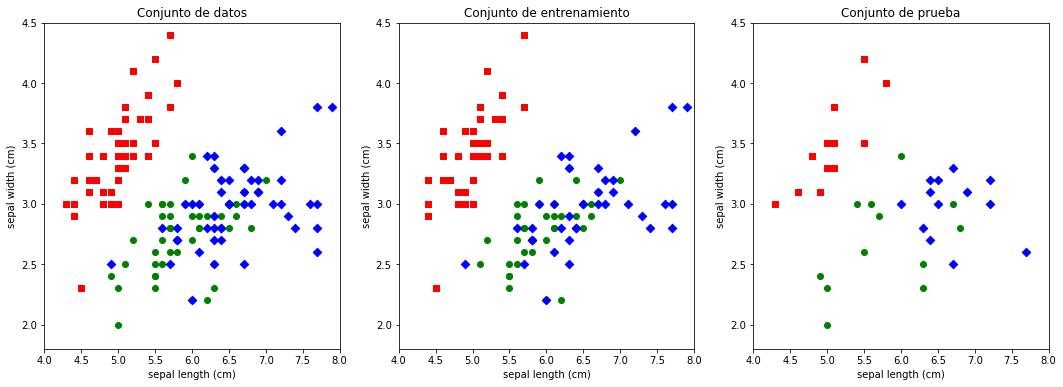

In [76]:
plt.rcParams["figure.figsize"] = [18,6]
plt.clf()
splt = plt.subplot(131)
splt.set_xlim(4,8)
splt.set_ylim(1.8,4.5)
splt.set_title("Conjunto de datos")
representacion_grafica(X_data,X_names,y_data,y_names,0,1)
splt = plt.subplot(132)
splt.set_xlim(4,8)
splt.set_ylim(1.8,4.5)
splt.set_title("Conjunto de entrenamiento")
representacion_grafica(X_train,X_names,y_train,y_names,0,1)
splt = plt.subplot(133)
splt.set_xlim(4,8)
splt.set_ylim(1.8,4.5)
splt.set_title("Conjunto de prueba")
representacion_grafica(X_test,X_names,y_test,y_names,0,1)
plt.show()

Ahora construimos un árbol de decisión con el conjunto de entrenamiento tal y como hemos hecho anteriormente. En este caso también fijamos el valor de la semilla del generador de números aleatorios.

In [77]:
tree3_clf = DecisionTreeClassifier(random_state=10)

tree3_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

La representación gráfica del árbol obtenido es la siguiente:

<Figure size 1296x432 with 0 Axes>

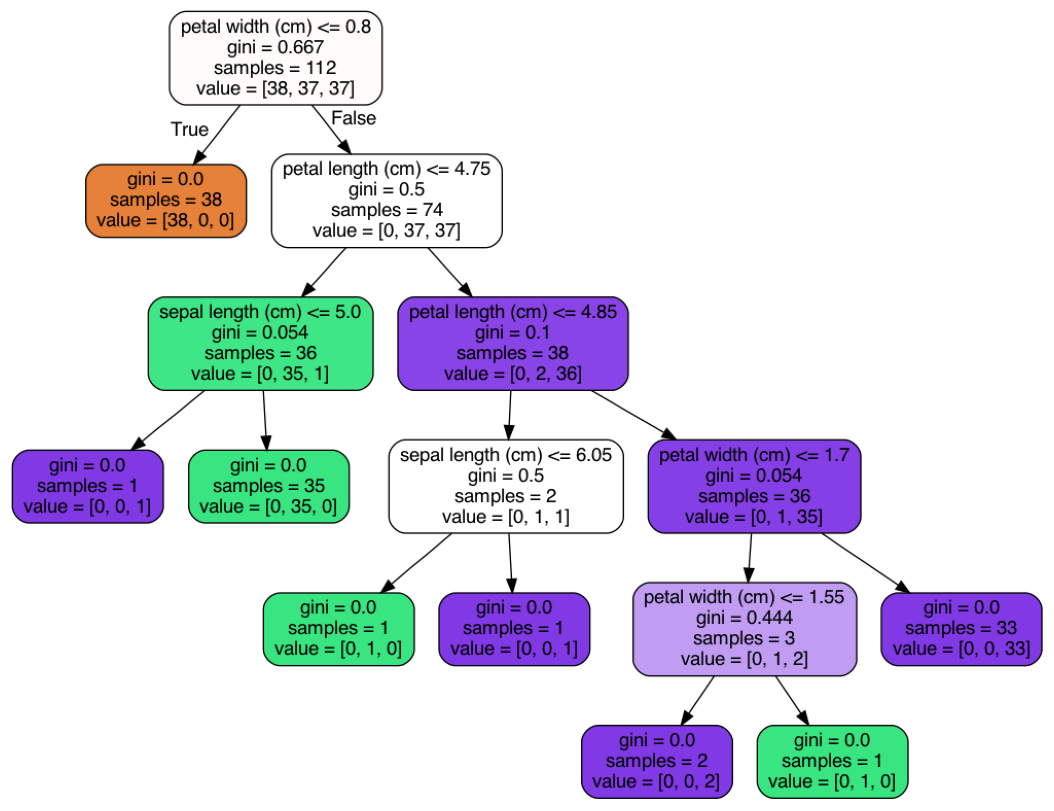

In [78]:
show_tree(tree3_clf,iris.feature_names)

Al igual que ocurría con el conjunto de datos original, el árbol obtenido tiene ramificaciones para distinguir conjuntos muy pequeños de datos. Veamos su rendimiento en el conjunto de prueba, para esto usamos el método `predict` del modelo obtenido:

In [79]:
tree3_clf.predict(X_test)

array([0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2,
       1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2])

Si comparamos estos resultados con los valores de clasificación reales en el conjunto de prueba, apreciamos varias diferencias:

In [80]:
y_test

array([0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1])

El rendimiento del modelo se puede obtener con el método `score` evaluado sobre el conjunto de prueba `X_test` y comparado con los valores de clasificación reales `y_test`. A continuación calculamos el rendimiento de este modelo en el conjunto de entrenamiento, el conjunto de prueba y el conjunto de datos inicial.

In [81]:
print("Rendimiento en el conjunto de entrenamiento: ",tree3_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree3_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree3_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.7631578947368421
Rendimiento en el conjunto total:  0.94


A continuación vamos a ver varias formas de mejorar el rendimiento del modelo obtenido, reduciendo su sobreajuste. 


### Prepoda: Máxima profundidad del árbol generado

Vamos a considerar primero varias técnicas de prepoda que evitan el desarrollo del árbol de decisión de acuerdo con diferentes criterios.

El primero que vamos a ver consiste en limitar la profundidad máxima del árbol generado. Esto se consigue con el parámetro `max_depth`, cuyo valor hay que establecer en el momento de construir la instancia del algoritmo de aprendizaje.

In [82]:
tree4_clf = DecisionTreeClassifier(random_state=10,max_depth=3)

tree4_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

Al visualizar el árbol obtenido veremos que hemos conseguido detener su desarrollo a la profundidad indicada.

<Figure size 1296x432 with 0 Axes>

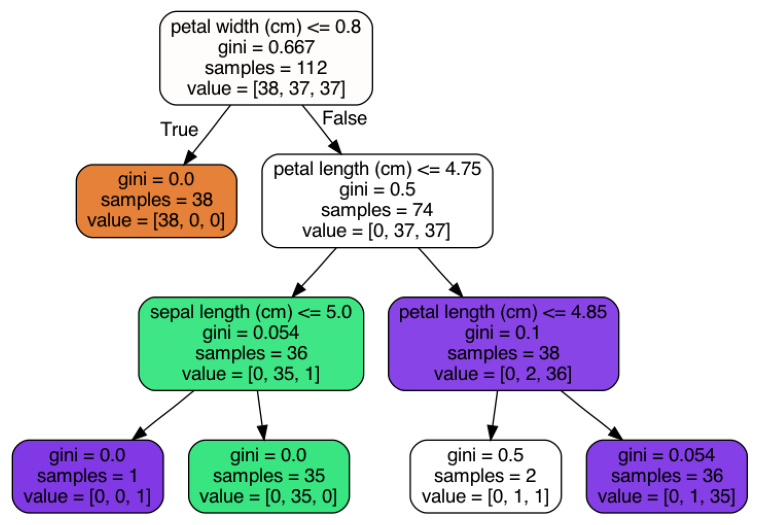

In [83]:
show_tree(tree4_clf,iris.feature_names)

La principal consecuencia de esta prepoda es una disminución del rendimiento en el conjunto de entrenamiento, pero un aumento del rendimiento en el conjunto de prueba.

In [84]:
print("Rendimiento en el conjunto de entrenamiento: ",tree4_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree4_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree4_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9821428571428571
Rendimiento en el conjunto de prueba:  0.8157894736842105
Rendimiento en el conjunto total:  0.94


Como era de esperar, el rendimiento en el conjunto de entrenamiento disminuye (si poda el rendimiento es `1`), aunque se obtiene un mejor rendimiento en el conjunto de prueba (ha subido de `0.74` a `0.81`). Sin embargo esto no siempre viene acompañado con una mejora en el rendimiento sobre el conjunto inicial (ha bajado sensiblemente) ni es lo que se pretende.

Para buscar la profundidad donde se obtiene un mejor rendimiento en el conjunto de entrenamiento, habría que probar con distintos valores hasta encontrar el deseado. En el siguiente fragmento de código se muestra como se podría hacer en este caso.

In [85]:
best_depth = 0
best_score = 0
for i in range(1,10):
    tree_clf = DecisionTreeClassifier(random_state=10,max_depth=i)
    tree_clf.fit(X_train,y_train)
    score = tree_clf.score(X_test,y_test)
    #print("Profundidad: ",i," - Score: ",score)
    if score > best_score:
        best_score = score
        best_depth = i
print("Mejor Profundidad: ",best_depth," - Score: ",best_score)

Mejor Profundidad:  2  - Score:  0.8947368421052632


Si construimos un árbol de decisión usando el parámetro de profundidad que hemos obtenido, podemos ver el aspecto que tiene y analizar su comportamiento en los conjuntos de datos.

In [86]:
tree4_clf = DecisionTreeClassifier(random_state=10,max_depth=2)

tree4_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=10)

<Figure size 1296x432 with 0 Axes>

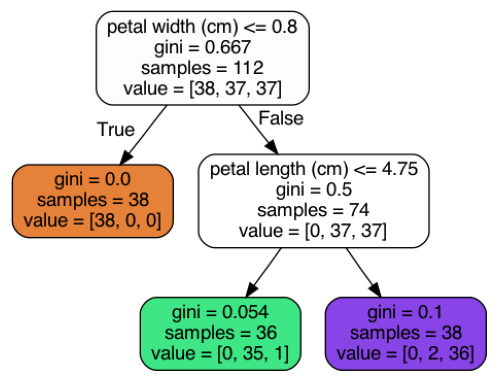

In [87]:
show_tree(tree4_clf,iris.feature_names)

En este caso, conseguimos un modelo de clasificación con mejor rendimiento tanto en el conjunto de prueba como el conjunto de datos inicial.

In [88]:
print("Rendimiento en el conjunto de entrenamiento: ",tree4_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree4_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree4_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9732142857142857
Rendimiento en el conjunto de prueba:  0.8947368421052632
Rendimiento en el conjunto total:  0.9533333333333334


Por supuesto, no se puede asegurar que una limitación en la profundidad del árbol de decisión construido vaya a mejorar siempre el rendimiento en el conjunto de prueba; ni que esa posible mejora tenga que venir acompañada de una mejora en el rendimiento en el conjunto inicial. Por eso, es conveniente considerar otros criterios para reducir el sobreajuste, hasta encontrar el más conveniente, si es que existe.

### Prepoda: Mínimo número de muestras en nodos internos 

Un segundo criterio que podemos considerar para podar el árbol de decisión durante su construcción consiste en limitar el número de muestras que debe tener un nodo para considerarlo un nodo interno del árbol y buscar un criterio de separación. Este valor se indica con el parámetro `min_samples_split` y se puede proporcionar como un valor absoluto (un número natural) o como una fracción del conjunto de muestras inicial (un número real entre 0 y 1). Si un nodo no tiene suficientes muestras asociadas entonces será considerado un nodo hoja cuyo valor de clasificación será el mayoritario entre sus muestras.

In [89]:
tree5_clf = DecisionTreeClassifier(random_state=10,min_samples_split=10)

tree5_clf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=10, random_state=10)

<Figure size 1296x432 with 0 Axes>

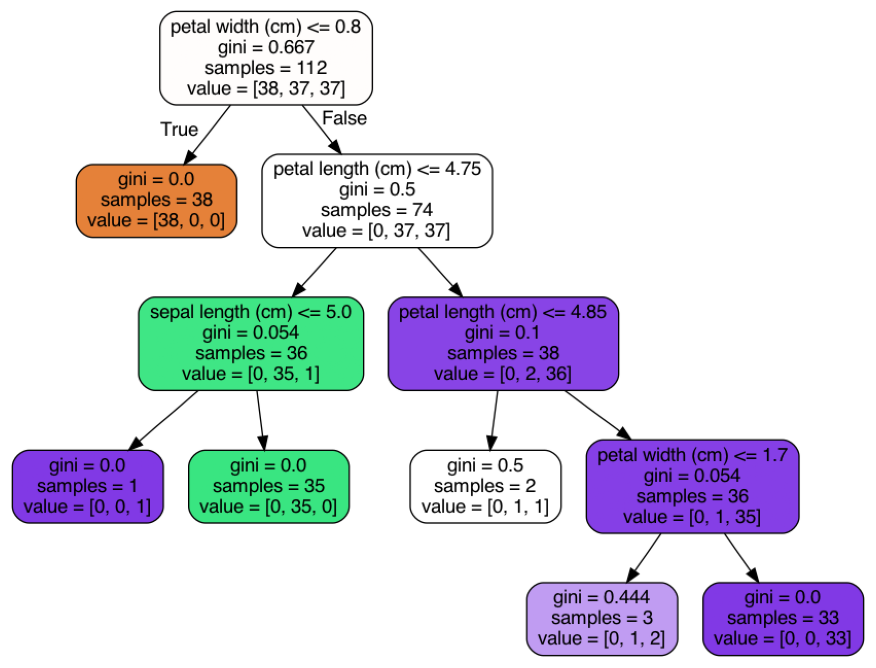

In [90]:
show_tree(tree5_clf,iris.feature_names)

En este caso, se han dejado de desarrollar dos nodos en los que todavía no se había obtenido un valor de clasificación definitivo. Veamos como influye esto en el rendimiento:

In [91]:
print("Rendimiento en el conjunto de entrenamiento: ",tree5_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree5_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree5_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9821428571428571
Rendimiento en el conjunto de prueba:  0.8157894736842105
Rendimiento en el conjunto total:  0.94


Habría que probar con distintos valores del parámetro `min_samples_split` hasta encontrar el más adecuado, si es que existe.

### Prepoda: Mínimo grado de impureza

El último parámetro para el que vamos a ver un ejemplo de construcción del árbol de decisión es el mínimo grado de impureza exigido en un nodo para considerarlo un nodo interno y buscar un criterio de separación. Este criterio detiene el desarrollo del árbol cuando la proporción de la clase dominante en el conjunto de muestras asociado es muy alta en comparación con las de las otras clases. Este valor se indica con el parámetro `min_impurity_split` como un valor comprendido entre 0 y 1. Si la impureza de un nodo no alcanza el mínimo, entonces será considerado un nodo hoja cuyo valor de clasificación será el mayoritario entre sus muestras.

In [92]:
tree6_clf = DecisionTreeClassifier(random_state=10,min_impurity_decrease=0.1)

tree6_clf.fit(X_train,y_train)

DecisionTreeClassifier(min_impurity_decrease=0.1, random_state=10)

<Figure size 1296x432 with 0 Axes>

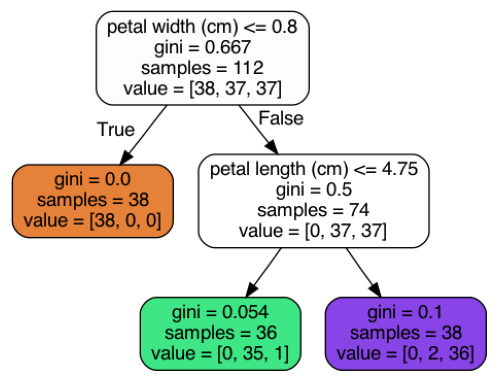

In [93]:
show_tree(tree6_clf,iris.feature_names)

En este caso, se han dejado de desarrollar dos nodos en los que todavía no se había obtenido un valor de clasificación definitivo. Veamos como influye esto en el rendimiento:

In [94]:
print("Rendimiento en el conjunto de entrenamiento: ",tree5_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree5_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree5_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9821428571428571
Rendimiento en el conjunto de prueba:  0.8157894736842105
Rendimiento en el conjunto total:  0.94


De nuevo, habría que probar con distintos valores del parámetro `min_impurity_split` hasta encontrar el más adecuado.

### Prepoda: Otros criterios

Otro criterios que podemos usar para detener el desarrollo del árbol de decisión son:

* `min_samples_leaf`: Un nodo será considerado como nodo interno si se puede encontrar un criterio de separación para dicho nodo que genere dos nodos con un número de muestras mayor o igual al valor indicado. El valor puede ser un número natural que indica una cantidad concreta o un número real entre 0 y 0.5 que indica una fracción del número de muestras inicial.
* `max_features`: Indica el número máximo de características a considerar cuando se busca el mejor criterio de separación para un nodo interno.
* `max_leaf_nodes`: Desarrolla el árbol de decisión hasta que se genera un número máximo de nodos hojas. Este desarrollo se realiza con una búsqueda por primero el mejor que valora los nodos con respecto a la reducción de la impureza.
* `min_impurity_decrease`: Establece un umbral para la reducción de la impureza en un nodo interno. Un nodo será considerado como nodo interno si se puede encontrar un criterio de separación que produce una reducción de la impureza mayor o igual que la indicada.

### Postpoda: Modificar el árbol de decisión generado

Otra forma de reducir el sobreajuste consiste en realizar una poda a posteriori del árbol de decisión generado. Esta forma de poda no está incluida en la librería *scikit_learn*, pero podemos aplicarla si entendemos la estructura de datos que se utiliza para almacenar el árbol de decisión.

Consideremos el árbol de decisión obtenido con el conjunto de entrenamiento y sin ningún tipo de poda durante el proceso de construcción:

<Figure size 1296x432 with 0 Axes>

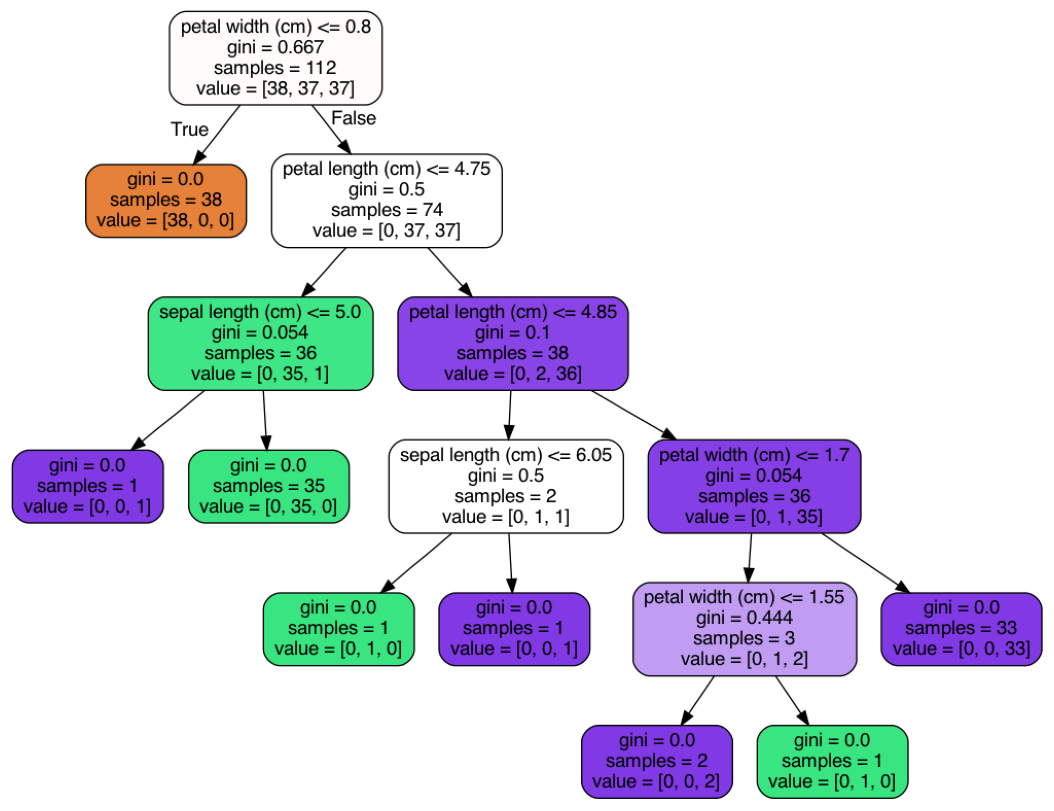

In [95]:
show_tree(tree3_clf,iris.feature_names)

El árbol de decisión está almacenado en el parámetro [`tree_`](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html) del objeto instancia del algoritmo de aprendizaje.

En este parámetro podemos encontrar el número de nodos del árbol de decisión:

In [96]:
tree3_clf.tree_.node_count

15

También contiene varios arrays que almacenan la estructura del árbol de decisión: cada nodo tiene asociado un índice comenzando en `0` para el nodo raíz; el array `children_left` contiene los índices de los hijos izquierdos de los nodos internos (los nodos hoja tienen el valor `-1`); el array `children_right` contiene los índices de los hijos derechos de los nodos internos (de nuevo, los nodos hoja tienen el valor `-1`); y el array `feature` contiene el índice de la característica considerada en el criterio de separación para los nodos internos (los nodos hoja tienen el valor `-2`).

Por ejemplo, en el árbol de decisión anterior estos valores son:

In [97]:
tree3_clf.tree_.children_left

array([ 1, -1,  3,  4, -1, -1,  7,  8, -1, -1, 11, 12, -1, -1, -1],
      dtype=int64)

In [98]:
tree3_clf.tree_.children_right

array([ 2, -1,  6,  5, -1, -1, 10,  9, -1, -1, 14, 13, -1, -1, -1],
      dtype=int64)

In [99]:
tree3_clf.tree_.feature

array([ 3, -2,  2,  0, -2, -2,  2,  0, -2, -2,  3,  3, -2, -2, -2],
      dtype=int64)

El nodo con índice `0` es el nodo raíz del árbol, su hijo izquierdo es el que tiene índice `1` (`children_left[0] = 1`), su hijo derecho es el que tiene índice `2` (`children_right[0] = 2`) y la característica que se considerada en el criterio de separación asociado es la de índice `3` (`feature[0] = 3`).

El nodo con índice `1` es el hijo izquierdo del nodo raíz, se trata de un nodo hoja (`children_left[1] = -1`, `children_right[1] = -1` y `feature[1] = -2`).

El nodo con índice `2` es el hijo derecho del nodo raíz, su hijo izquierdo es el que tiene índice `3`, su hijo derecho es el que tiene índice `6` y la característica considerada en el criterio de separación asociado es la de índice `2`.

Para podar a posteriori un árbol de decisión en un nodo concreto, basta con asignar el valor `-1` a la entrada correspondiente en los arrays `children_left` y `children_right` y el valor `-2` a la del array `feature`. Vamos a verlo en este caso podando el árbol en los nodos de índices `3` y `6`.

Para realizar la poda en el árbol de decisión original sin perderlo, para poder hacer otras podas y comparar resultados, vamos a hacer una copia de toda su estructura con la función `deepcopy` de la librería `copy`.

In [100]:
from copy import deepcopy

tree3A_clf = deepcopy(tree3_clf)

Ahora cambiamos los valores asociados al índice del nodo que queremos podar (el `3`) en los arrays `children_left`, `children_right` y `feature`, asignándole los valores `-1`, `-1` y `-2`, respectivamente.

In [101]:
tree3A_clf.tree_.children_left[3] = -1
tree3A_clf.tree_.children_right[3] = -1
tree3A_clf.tree_.feature[3] = -2

Si visualizamos el resultado podemos comprobar el efecto de la poda:

<Figure size 1296x432 with 0 Axes>

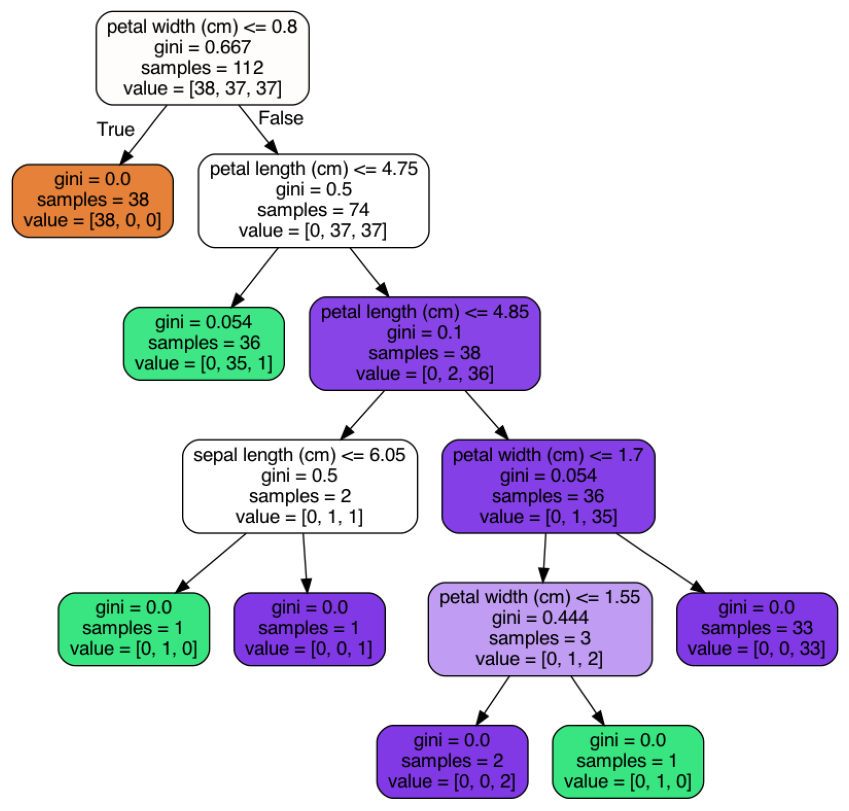

In [102]:
show_tree(tree3A_clf,iris.feature_names)

Veamos como ha afectado la poda al rendimiento:

In [103]:
print("Rendimiento en el conjunto de entrenamiento: ",tree3A_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree3A_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree3A_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9910714285714286
Rendimiento en el conjunto de prueba:  0.8421052631578947
Rendimiento en el conjunto total:  0.9533333333333334


Vamos a repetir otra vez el experimento, ahora para podar el nodo con índice `6`:

In [104]:
tree3B_clf = deepcopy(tree3_clf)

tree3B_clf.tree_.children_left[6] = -1
tree3B_clf.tree_.children_right[6] = -1
tree3B_clf.tree_.feature[6] = -2

Si visualizamos el resultado podemos comprobar el efecto de la poda:

<Figure size 1296x432 with 0 Axes>

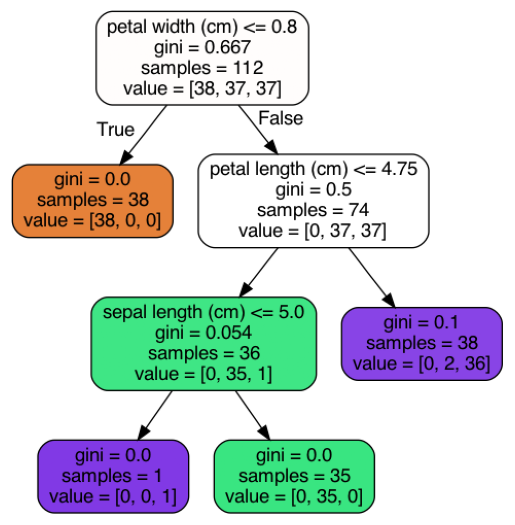

In [105]:
show_tree(tree3B_clf,iris.feature_names)

Veamos como ha afectado esta segunda poda al rendimiento:

In [106]:
print("Rendimiento en el conjunto de entrenamiento: ",tree3B_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree3B_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree3B_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9821428571428571
Rendimiento en el conjunto de prueba:  0.8157894736842105
Rendimiento en el conjunto total:  0.94


Para terminar el experimento, vamos a podar ambos nodos.

In [107]:
tree3AB_clf = deepcopy(tree3_clf)

tree3AB_clf.tree_.children_left[3] = -1
tree3AB_clf.tree_.children_right[3] = -1
tree3AB_clf.tree_.feature[3] = -2
tree3AB_clf.tree_.children_left[6] = -1
tree3AB_clf.tree_.children_right[6] = -1
tree3AB_clf.tree_.feature[6] = -2

Visualizamos el resultado para comprobar el efecto de la poda:

<Figure size 1296x432 with 0 Axes>

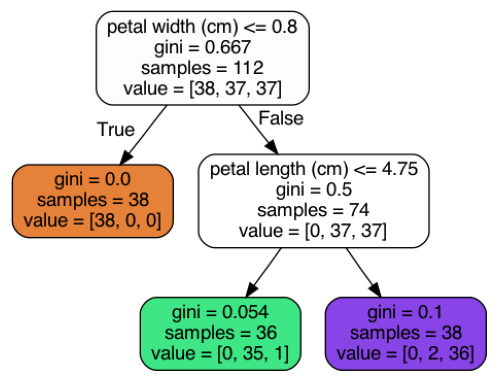

In [108]:
show_tree(tree3AB_clf,iris.feature_names)

El efecto de ambas podas en el rendimiento es el siguiente:

In [109]:
print("Rendimiento en el conjunto de entrenamiento: ",tree3AB_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree3AB_clf.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",tree3AB_clf.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9732142857142857
Rendimiento en el conjunto de prueba:  0.8947368421052632
Rendimiento en el conjunto total:  0.9533333333333334


### *Random Forest*

Veamos ahora otra técnica para reducir el sobreajuste, la combinación de modelos. En la biblioteca *scikit_learn* disponemos de una implementación de la técnica *Random Forest* con la clase `RandomForestClassifier` de la librería `ensemble`. En este caso, además de los criterios para limitar el desarrollo del árbol de decisión que hemos visto antes, se incluye el parámetro `n_estimators` con el que se índica el número de árboles que se van a construir.

In [110]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=9)

Entrenamos este algoritmo de aprendizaje con el conjunto de datos de entrenamiento usando el método `fit`.

In [111]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=9)

El método `predict` devuelve la clase predicha para un conjunto de muestras. En este caso lo usamos para las 10 primeras muestras del conjunto de prueba.

In [112]:
forest.predict(X_test[0:10])

array([0, 2, 0, 1, 1, 1, 2, 2, 0, 2])

Una vez entrenada, la clase `RandomForestClassifier` almacena en el parámetro `estimators_` un array con los árboles de decisión que forman el conjunto. Estos objetos se pueden utilizar de forma independiente, por ejemplo para ver la clase predicha para un conjunto de muestras. Si vemos los resultados para las 10 primeras muestras del conjunto de prueba podemos confirmar que la predicción del conjunto de árboles es la de la clase mayoritaria entre las predicciones independientes de los árboles de decisión.

In [113]:
for i in range(9):
    print(forest.estimators_[i].predict(X_test[0:10]))

[0. 2. 0. 1. 2. 1. 2. 2. 0. 2.]
[0. 2. 0. 1. 1. 1. 2. 2. 0. 2.]
[0. 2. 0. 1. 1. 1. 2. 2. 0. 2.]
[0. 2. 0. 1. 1. 2. 2. 2. 0. 2.]
[0. 2. 0. 1. 1. 1. 2. 1. 0. 2.]
[0. 2. 0. 1. 1. 1. 2. 2. 0. 2.]
[0. 2. 0. 1. 1. 1. 2. 2. 0. 2.]
[0. 2. 0. 2. 2. 1. 2. 2. 0. 2.]
[0. 2. 0. 1. 1. 1. 2. 2. 0. 2.]


El efecto en el rendimiento es bastante mejor que en casos anteriores:

In [114]:
print("Rendimiento en el conjunto de entrenamiento: ",forest.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",forest.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",forest.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9821428571428571
Rendimiento en el conjunto de prueba:  0.9210526315789473
Rendimiento en el conjunto total:  0.9666666666666667


Podemos visualizar cualquiera de los árboles que forman el conjunto a partir de la entrada correspondiente del parámetro `estimators_`:

<Figure size 1296x432 with 0 Axes>

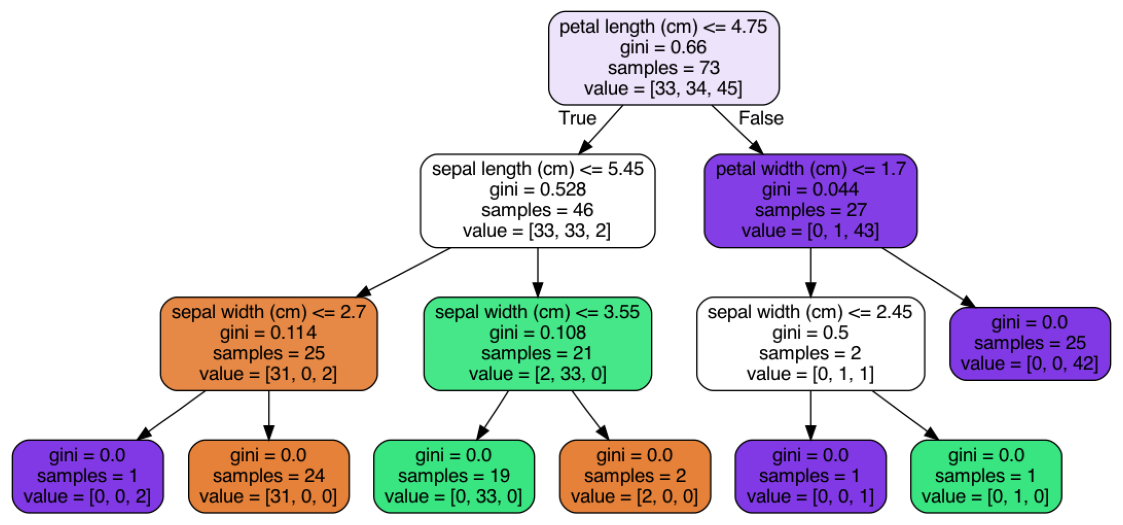

In [115]:
show_tree(forest.estimators_[3],iris.feature_names)

### *Gradient Boosting*

La segunda técnica de combinación de modelos que hemos visto es *Gradient Boosted Regresion Trees*. En la biblioteca scikit_learn disponemos de una implementación de esta técnica con la clase `GradientBoostingClassifier` de la librería ensemble. De nuevo, con el parámetro `n_estimators` indicamos el número de árboles que se van a construir.

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

ensemble = GradientBoostingClassifier(n_estimators=10)

Entrenamos este algoritmo de aprendizaje con el conjunto de datos de entrenamiento usando el método `fit`.

In [117]:
ensemble.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10)

El rendimiento de este clasificador en los conjuntos de datos es el siguiente:

In [118]:
print("Rendimiento en el conjunto de entrenamiento: ",ensemble.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",ensemble.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",ensemble.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  1.0
Rendimiento en el conjunto de prueba:  0.8947368421052632
Rendimiento en el conjunto total:  0.9733333333333334


Como el rendimiento en el conjunto de entrenamiento es del 100%, es muy probable que el modelo esté sobreajustado. Podemos reducir el sobreajuste con cualquier parámetro de los vistos para realizar poda en los árboles generados (por ejemplo `max_depth`) o con parámetros específicos del proceso de construcción del conjunto de clasificadores (por ejemplo `learning_rate`).

In [119]:
ensemble = GradientBoostingClassifier(n_estimators=10,max_depth=1)

ensemble.fit(X_train,y_train)

print("Rendimiento en el conjunto de entrenamiento: ",ensemble.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",ensemble.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",ensemble.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9821428571428571
Rendimiento en el conjunto de prueba:  0.9210526315789473
Rendimiento en el conjunto total:  0.9666666666666667


In [120]:
ensemble = GradientBoostingClassifier(n_estimators=10,learning_rate=0.02)

ensemble.fit(X_train,y_train)

print("Rendimiento en el conjunto de entrenamiento: ",ensemble.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",ensemble.score(X_test,y_test))
print("Rendimiento en el conjunto total: ",ensemble.score(X_data,y_data))

Rendimiento en el conjunto de entrenamiento:  0.9910714285714286
Rendimiento en el conjunto de prueba:  0.8947368421052632
Rendimiento en el conjunto total:  0.9666666666666667
